In [1]:
import os
import zipfile

In [1]:
#train dataset link: https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip

#validation dataset linl : https://storage. .com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip

In [2]:
# extracting validation data and train data

local_zip = 'C:/Users/darsh/Desktop/neural/usingTensorflow//validation-horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('C:/Users/darsh/Desktop/neural/usingTensorflow/validation-horse-or-human')


local_zip = 'C:/Users/darsh/Desktop/neural/usingTensorflow/horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('C:/Users/darsh/Desktop/neural/usingTensorflow/horse-or-human')
zip_ref.close()

In [3]:
#dir with train horse images
train_horse_dir = os.path.join('C:/Users/darsh/Desktop/neural/usingTensorflow/horse-or-human/horses')

#dir with train humans images
train_human_dir = os.path.join('C:/Users/darsh/Desktop/neural/usingTensorflow/horse-or-human/humans')

#dir with validation horse images
validation_horse_dir = os.path.join('C:/Users/darsh/Desktop/neural/usingTensorflow/validation-horse-or-human/horses')

#dir with validation human images
validation_human_dir = os.path.join('C:/Users/darsh/Desktop/neural/usingTensorflow/validation-horse-or-human/humans')

In [4]:
train_horse_names = os.listdir(train_horse_dir)
train_human_names = os.listdir(train_human_dir)

validation_horse_names = os.listdir(validation_horse_dir)
validation_human_names = os.listdir(validation_horse_dir)

In [6]:
import tensorflow as tf
import numpy as np


horse01-0.png


In [7]:
model = tf.keras.Sequential([
    #first convolution
        tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(300,300,3)),
        tf.keras.layers.MaxPooling2D(2,2),
    #second convolution
        tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
    #third convolution
        tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(units=256,activation='relu'),
        tf.keras.layers.Dense(units=128,activation='relu'),
        tf.keras.layers.Dense(units=1,activation='sigmoid')
])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 78400)             0

In [9]:
from tensorflow.keras.optimizers import RMSprop


In [12]:
#model compile
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['accuracy'])

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen= ImageDataGenerator(rescale=1/255.)
validation_datagen= ImageDataGenerator(rescale=1/255.)

train_generator = train_datagen.flow_from_directory(
    'C:/Users/darsh/Desktop/neural/usingTensorflow/horse-or-human/',
    target_size=(300,300),
    batch_size=32,
    class_mode='binary'
)

validation_generator = train_datagen.flow_from_directory(
    'C:/Users/darsh/Desktop/neural/usingTensorflow/validation-horse-or-human/',
    target_size=(300,300),
    batch_size=32,
    class_mode='binary'
)

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


In [19]:
history = model.fit(
train_generator,
steps_per_epoch=8,
epochs=10,
verbose=1,
validation_data= validation_generator,
validation_steps=8)

Epoch 1/10
8/8 [==============================] - 17s 2s/step - loss: 0.7341 - accuracy: 0.5781 - val_loss: 0.4779 - val_accuracy: 0.8633
Epoch 2/10
8/8 [==============================] - 19s 2s/step - loss: 0.6188 - accuracy: 0.6719 - val_loss: 1.0203 - val_accuracy: 0.5820
Epoch 3/10
8/8 [==============================] - 21s 3s/step - loss: 0.2155 - accuracy: 0.9180 - val_loss: 3.1746 - val_accuracy: 0.5156
Epoch 4/10
8/8 [==============================] - 19s 2s/step - loss: 0.3223 - accuracy: 0.8594 - val_loss: 1.9004 - val_accuracy: 0.6445
Epoch 5/10
8/8 [==============================] - 19s 2s/step - loss: 0.1093 - accuracy: 0.9492 - val_loss: 1.2075 - val_accuracy: 0.8203
Epoch 6/10
8/8 [==============================] - 17s 2s/step - loss: 0.2894 - accuracy: 0.9031 - val_loss: 1.3704 - val_accuracy: 0.6797
Epoch 7/10
8/8 [==============================] - 18s 2s/step - loss: 0.1221 - accuracy: 0.9648 - val_loss: 2.5121 - val_accuracy: 0.6406
Epoch 8/10
8/8 [==================

that is an image of horse


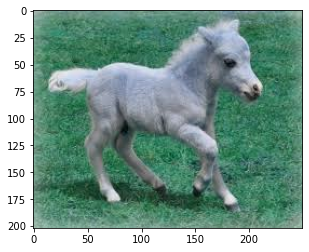

In [83]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


img = cv2.imread('babyhorse.jpg')
plt.imshow(img)
img = cv2.resize(img,(300,300))
img = np.reshape(img,[1,300,300,3])

classes = model.predict_classes(img)

if (classes==0):
    print('that is an image of horse')
else:
    print('that is an image of human')

